In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score , precision_score , confusion_matrix , classification_report , ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor

In [23]:
df = pd.read_csv(r"C:\Users\User\Downloads\heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


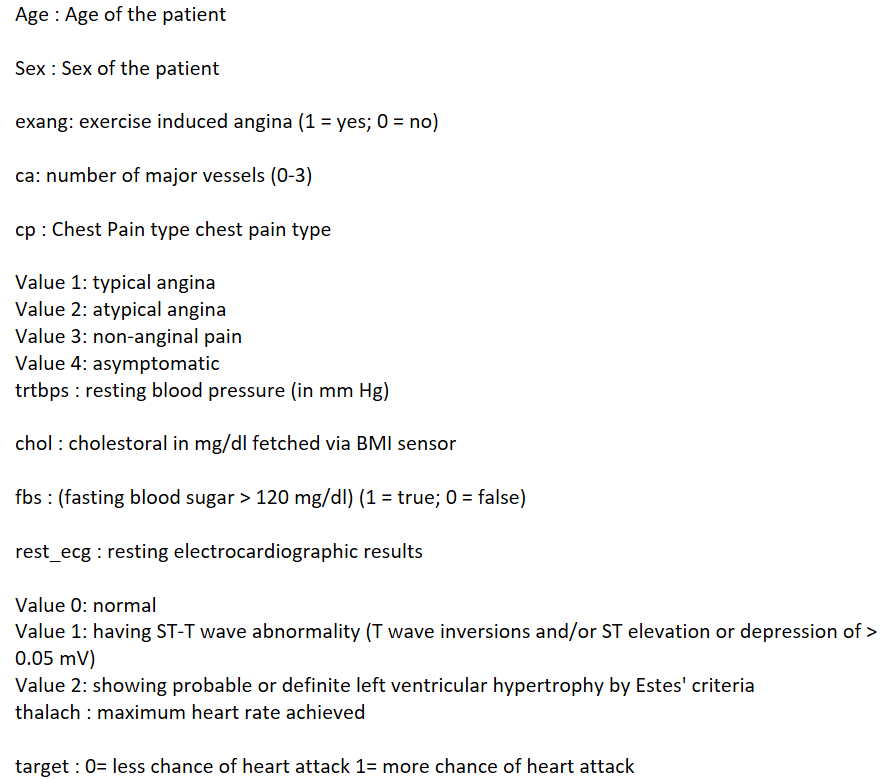

In [24]:
df = df.rename(columns={"exng":"Excercise" , "cp": "Chest_Pain" , "trtbps":"Blood_Pressure" , "chol":"Cholestrol" , "fbs":"Blood_Sugar" , "rest_ecg":"ECG_Report" , "thalachh":"Max_Heart_Rate"})

In [25]:
df

,age,sex,Chest_Pain,Blood_Pressure,Cholestrol,Blood_Sugar,restecg,Max_Heart_Rate,Excercise,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [26]:
df.shape

(303, 14)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             303 non-null    int64  
 1   sex             303 non-null    int64  
 2   Chest_Pain      303 non-null    int64  
 3   Blood_Pressure  303 non-null    int64  
 4   Cholestrol      303 non-null    int64  
 5   Blood_Sugar     303 non-null    int64  
 6   restecg         303 non-null    int64  
 7   Max_Heart_Rate  303 non-null    int64  
 8   Excercise       303 non-null    int64  
 9   oldpeak         303 non-null    float64
 10  slp             303 non-null    int64  
 11  caa             303 non-null    int64  
 12  thall           303 non-null    int64  
 13  output          303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [28]:
df.duplicated().sum()

1

In [29]:
df.drop_duplicates(inplace=True)

In [30]:
df.duplicated().sum()

0

In [31]:
df.isna().sum()

age               0
sex               0
Chest_Pain        0
Blood_Pressure    0
Cholestrol        0
Blood_Sugar       0
restecg           0
Max_Heart_Rate    0
Excercise         0
oldpeak           0
slp               0
caa               0
thall             0
output            0
dtype: int64

In [32]:
df.dtypes

age                 int64
sex                 int64
Chest_Pain          int64
Blood_Pressure      int64
Cholestrol          int64
Blood_Sugar         int64
restecg             int64
Max_Heart_Rate      int64
Excercise           int64
oldpeak           float64
slp                 int64
caa                 int64
thall               int64
output              int64
dtype: object

In [34]:
X = df.drop("output" , axis=True)
y = df['output']

X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2 , random_state=233)

In [76]:
dt = DecisionTreeClassifier(max_depth=7)

In [77]:
dt.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=7)

In [78]:
y_pred = df.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [79]:
accuracy_score(y_test , y_pred)

0.819672131147541

In [80]:
from sklearn import tree

<function matplotlib.pyplot.show(close=None, block=None)>

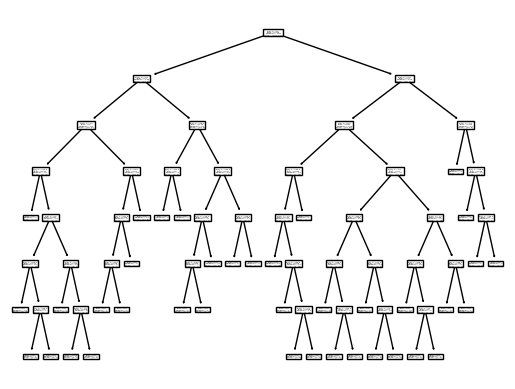

In [81]:
tree.plot_tree(dt)
plt.show

In [82]:
df.feature_names_in_

array(['age', 'sex', 'Chest_Pain', 'Blood_Pressure', 'Cholestrol',
       'Blood_Sugar', 'restecg', 'Max_Heart_Rate', 'Excercise', 'oldpeak',
       'slp', 'caa', 'thall'], dtype=object)

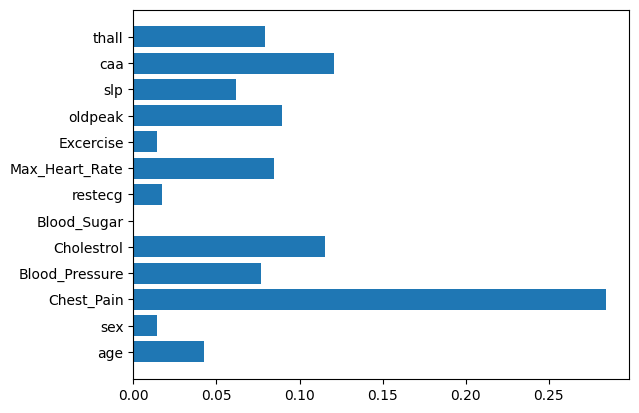

In [67]:
plt.barh(y = dt.feature_names_in_ , width=dt.feature_importances_)
plt.show()